In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
t_list = [300, 400, 500, 600, 678, 800]
methods = ['DFT', 'MLFF']
n_atoms = 256

In [3]:
fs = 13
s = 35

#color scheme
three = (0, 0, 0.8)
four = (0.3, 0.3, 1)
five = (0.8, 0.8, 1)
six = (1, 0.7, 0.7)
seven = (1, 0.2, 0.2)
eight = (0.7, 0.0, 0.0)

In [4]:
def rmse(dft, ml):
    rmse = np.sqrt(((dft - ml) ** 2).mean())
    return rmse

def mae(dft, ml):
    mae = np.sum(np.abs(dft -  ml))/len(dft)
    return mae

def norm(force_components):
    force_norm = np.sum(np.abs(force_components.reshape((-1,3)))**2,axis=-1)**(1/2)
    return force_norm

### Benchmark against energies

In [5]:
dft_e = []
mlff_e = []
dft_erre = np.array([])
mlff_erre = np.array([])

In [6]:
for t in t_list:
    for method in methods:
        e_t = np.loadtxt(str(t)+method+'energies.txt')*1000/n_atoms #eV/atom
        if method == 'DFT':
            dft_erre = np.concatenate((dft_erre, e_t))
            dft_e.append(e_t.tolist())
        else: 
            mlff_erre = np.concatenate((mlff_erre, e_t))
            mlff_e.append(e_t.tolist())

In [7]:
e_mae = mae(dft_erre, mlff_erre)
e_rmse = rmse(dft_erre, mlff_erre)
e_max = max(np.abs(dft_erre - mlff_erre))

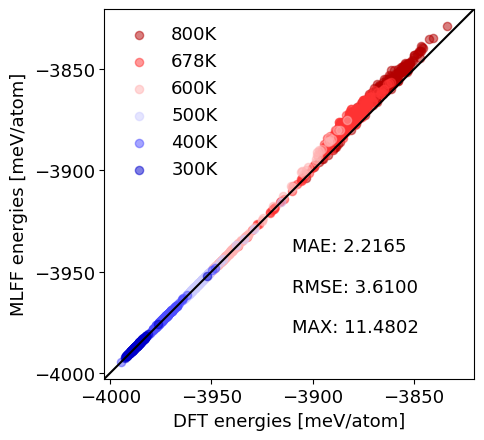

In [8]:
fig, ax = plt.subplots()
ax.set_prop_cycle(color = [eight, seven, six, five, four, three])
for i in reversed(range(0, len(t_list))):
    plt.scatter(dft_e[i], mlff_e[i], label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)

#plot x=y line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#annotate errors
plt.annotate('MAE: '+str('{:.4f}'.format(e_mae)), (-3910, -3940), fontsize=fs)
plt.annotate('RMSE: '+str('{:.4f}'.format(e_rmse)), (-3910, -3960), fontsize=fs)
plt.annotate('MAX: '+str('{:.4f}'.format(e_max)), (-3910, -3980), fontsize=fs)

plt.locator_params(nbins=4)
plt.xlabel('DFT energies [meV/atom]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('MLFF energies [meV/atom]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(frameon=False, fontsize=fs)
plt.show()

### Benchmark against force components

In [9]:
dft_f = []
mlff_f= []
dft_errf = np.array([])
mlff_errf = np.array([])

In [10]:
for t in t_list:
    for method in methods:
        f_t = np.loadtxt(str(t)+method+'forces.txt') #eV/Å
        if method == 'DFT':
            dft_errf = np.concatenate((dft_errf, f_t))
            dft_f.append(f_t)
        else: 
            mlff_errf = np.concatenate((mlff_errf, f_t))
            mlff_f.append(f_t)

In [11]:
fc_mae = mae(dft_errf, mlff_errf)
fc_rmse = rmse(dft_errf, mlff_errf)
fc_max = max(np.abs(dft_errf - mlff_errf))

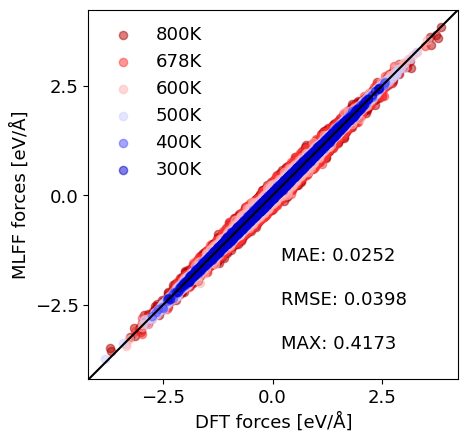

In [12]:
fig, ax = plt.subplots()
ax.set_prop_cycle(color = [eight, seven, six, five, four, three])
for i in reversed(range(0, len(t_list))):
    plt.scatter(dft_f[i], mlff_f[i], label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)

#plot x=y line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#annotate errors
plt.annotate('MAE: '+str('{:.4f}'.format(fc_mae)), (0.2, -1.5), fontsize=fs)
plt.annotate('RMSE: '+str('{:.4f}'.format(fc_rmse)), (0.2, -2.5), fontsize=fs)
plt.annotate('MAX: '+str('{:.4f}'.format(fc_max)), (0.2, -3.5), fontsize=fs)
1
plt.locator_params(nbins=4)
plt.xlabel('DFT forces [eV/Å]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('MLFF forces [eV/Å]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(frameon=False, fontsize=fs, loc='upper left')
plt.show()

### Benchmark against force magnitudes

In [13]:
fm_mae = mae(norm(dft_errf), norm(mlff_errf))
fm_rmse = rmse(norm(dft_errf), norm(mlff_errf))
fm_max = max(np.abs(norm(dft_errf) - norm(mlff_errf)))

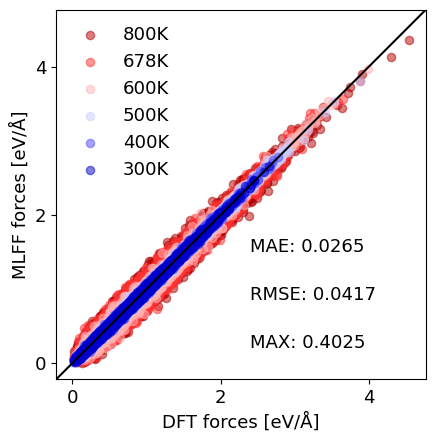

In [14]:
fig, ax = plt.subplots()
ax.set_prop_cycle(color = [eight, seven, six, five, four, three])
for i in reversed(range(0, len(t_list))):
    plt.scatter(norm(dft_f[i]), norm(mlff_f[i]), label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)

#plot x=y line
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#annotate errors
plt.annotate('MAE: '+str('{:.4f}'.format(fm_mae)), (2.4, 1.5), fontsize=fs)
plt.annotate('RMSE: '+str('{:.4f}'.format(fm_rmse)), (2.4, 0.85), fontsize=fs)
plt.annotate('MAX: '+str('{:.4f}'.format(fm_max)), (2.4, 0.2), fontsize=fs)
plt.locator_params(nbins=4)
plt.xlabel('DFT forces [eV/Å]', fontsize=fs)
plt.xticks(fontsize=fs)
plt.ylabel('MLFF forces [eV/Å]', fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(frameon=False, fontsize=fs, loc='upper left')
plt.show()

### Publication ready figure

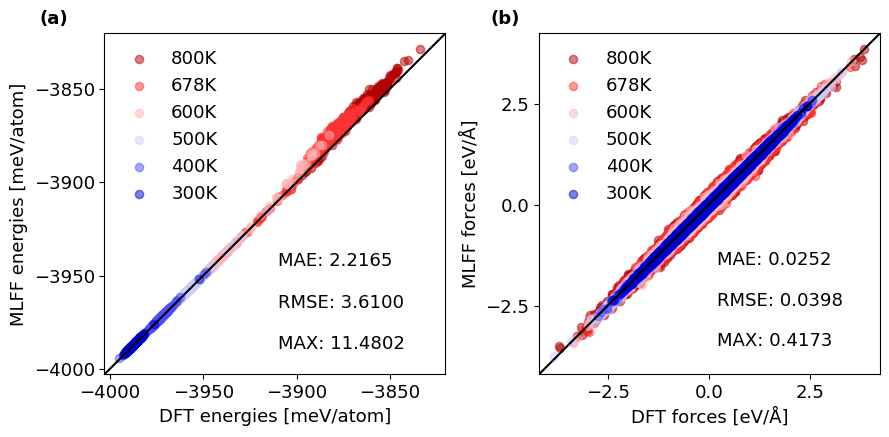

In [15]:
#using force components

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

for i in range(0, 2):
    ax[i].set_prop_cycle(color = [eight, seven, six, five, four, three])

for i in reversed(range(0, len(t_list))):
    ax[0].scatter(dft_e[i], mlff_e[i], label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)
    ax[1].scatter(dft_f[i], mlff_f[i], label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)

#plot x=y line
for i in range (0, 2):
    lims = [np.min([ax[i].get_xlim(), ax[i].get_ylim()]), np.max([ax[i].get_xlim(), ax[i].get_ylim()])]
    ax[i].plot(lims, lims, 'k')
    ax[i].set_aspect('equal')
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)
    ax[i].locator_params(nbins=4)
    ax[i].legend(frameon=False, fontsize=fs)
    ax[i].tick_params(axis='both', which='major', labelsize=fs)
    ax[i].tick_params(axis='both', which='minor', labelsize=fs)

#annotate errors
ax[0].annotate('MAE: '+str('{:.4f}'.format(e_mae)), (-3910, -3945), fontsize=fs)
ax[0].annotate('RMSE: '+str('{:.4f}'.format(e_rmse)), (-3910, -3967), fontsize=fs)
ax[0].annotate('MAX: '+str('{:.4f}'.format(e_max)), (-3910, -3989), fontsize=fs)
ax[1].annotate('MAE: '+str('{:.4f}'.format(fc_mae)), (0.2, -1.5), fontsize=fs)
ax[1].annotate('RMSE: '+str('{:.4f}'.format(fc_rmse)), (0.2, -2.5), fontsize=fs)
ax[1].annotate('MAX: '+str('{:.4f}'.format(fc_max)), (0.2, -3.5), fontsize=fs)

ax[0].set_xlabel('DFT energies [meV/atom]', fontsize=fs)
ax[0].set_ylabel('MLFF energies [meV/atom]', fontsize=fs)
ax[1].set_xlabel('DFT forces [eV/Å]', fontsize=fs)
ax[1].set_ylabel('MLFF forces [eV/Å]', fontsize=fs)
fig.tight_layout()
fig.text(0.05, 0.7, '(a)', fontsize=fs, weight='bold')
fig.text(0.55, 0.7, '(b)', fontsize=fs, weight='bold')
#plt.savefig('benchmark_fc_e.png', bbox_inches='tight', dpi=1000)
plt.show()

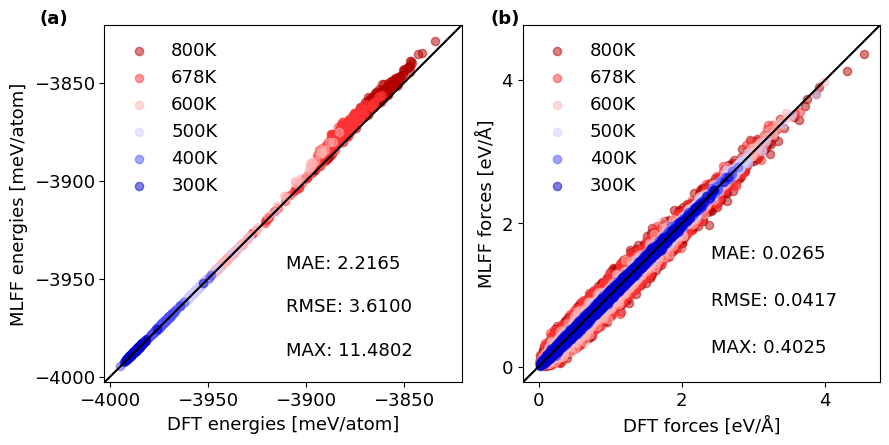

In [17]:
#using force norms

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

for i in range(0, 2):
    ax[i].set_prop_cycle(color = [eight, seven, six, five, four, three])

for i in reversed(range(0, len(t_list))):
    ax[0].scatter(dft_e[i], mlff_e[i], label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)
    ax[1].scatter(norm(dft_f[i]), norm(mlff_f[i]), label=str(t_list[i])+'K', marker='o', alpha=0.5, s=s)

#plot x=y line
for i in range (0, 2):
    lims = [np.min([ax[i].get_xlim(), ax[i].get_ylim()]), np.max([ax[i].get_xlim(), ax[i].get_ylim()])]
    ax[i].plot(lims, lims, 'k')
    ax[i].set_aspect('equal')
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)
    ax[i].locator_params(nbins=4)
    ax[i].legend(frameon=False, fontsize=fs)
    ax[i].tick_params(axis='both', which='major', labelsize=fs)
    ax[i].tick_params(axis='both', which='minor', labelsize=fs)

#annotate errors
ax[0].annotate('MAE: '+str('{:.4f}'.format(e_mae)), (-3910, -3945), fontsize=fs)
ax[0].annotate('RMSE: '+str('{:.4f}'.format(e_rmse)), (-3910, -3967), fontsize=fs)
ax[0].annotate('MAX: '+str('{:.4f}'.format(e_max)), (-3910, -3989), fontsize=fs)
plt.annotate('MAE: '+str('{:.4f}'.format(fm_mae)), (2.4, 1.5), fontsize=fs)
plt.annotate('RMSE: '+str('{:.4f}'.format(fm_rmse)), (2.4, 0.85), fontsize=fs)
plt.annotate('MAX: '+str('{:.4f}'.format(fm_max)), (2.4, 0.2), fontsize=fs)

ax[0].set_xlabel('DFT energies [meV/atom]', fontsize=fs)
ax[0].set_ylabel('MLFF energies [meV/atom]', fontsize=fs)
ax[1].set_xlabel('DFT forces [eV/Å]', fontsize=fs)
ax[1].set_ylabel('MLFF forces [eV/Å]', fontsize=fs)
fig.tight_layout()
fig.text(0.05, 0.7, '(a)', fontsize=fs, weight='bold')
fig.text(0.55, 0.7, '(b)', fontsize=fs, weight='bold')
#plt.savefig('benchmark_fm_e.png', bbox_inches='tight', dpi=1000)
plt.show()